# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [54]:
df = pd.read_csv('Dataset_inisiasi.csv')

In [55]:
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,LoginAttempts,TimeGap,TransactionHour,DBSCAN_Cluster
0,14.09,70.0,81.0,5112.21,1.0,824618.900000,16.0,0
1,376.24,68.0,141.0,13758.91,1.0,713725.266667,16.0,0
2,126.29,19.0,56.0,1122.35,1.0,694910.933333,18.0,0
3,184.50,26.0,25.0,8569.06,1.0,790056.916667,16.0,0
4,13.45,26.0,198.0,7429.40,1.0,553815.250000,17.0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [56]:
X = df.drop('DBSCAN_Cluster', axis=1)
y = df['DBSCAN_Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
print(f'Jumlah semua data: {len(X)}')
print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')

Jumlah semua data: 2512
Jumlah data latih: 1758
Jumlah data uji: 754


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [58]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Saya menggunakan Algoritma Random Forest dan K-Nearest Neighbors karena:
- Random Forest dapat membuat prediksi atau klasifikasi yang akurat dan stabil di kebanyakan masalah. Selain itu, algoritma ini juga mampu menangani dataset dengan fitur yang kompleks dan interaksi antar fitur.

- KNN merupakan algoritma yang mudah diimplementasikan, tidak memerlukan proses pelatihan yang lama, dan dapat bekerja dengan baik jika data memiliki pola yang jelas.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [59]:
# Melakukan prediksi menggunakan data uji
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Menghitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Akurasi Random Forest: {accuracy_rf}')
print(f'Akurasi KNN: {accuracy_knn}')

f1_score_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f'F1-Score Random Forest: {f1_score_rf}')
print(f'F1-Score KNN: {f1_score_knn}')

precision_score_rf = precision_score(y_test, y_pred_rf, average='weighted')
precision_score_knn = precision_score(y_test, y_pred_knn, average='weighted')

print(f'Precision Random Forest: {precision_score_rf}')
print(f'Precision KNN: {precision_score_knn}')

recall_score_rf = recall_score(y_test, y_pred_rf, average='weighted')
recall_score_knn = recall_score(y_test, y_pred_knn, average='weighted')

print(f'Recall Random Forest: {recall_score_rf}')
print(f'Recall KNN: {recall_score_knn}')

Akurasi Random Forest: 0.993368700265252
Akurasi KNN: 0.9694960212201591
F1-Score Random Forest: 0.9932285264497207
F1-Score KNN: 0.9557859764756317
Precision Random Forest: 0.993558165971959
Precision KNN: 0.9424582835765691
Recall Random Forest: 0.993368700265252
Recall KNN: 0.9694960212201591


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


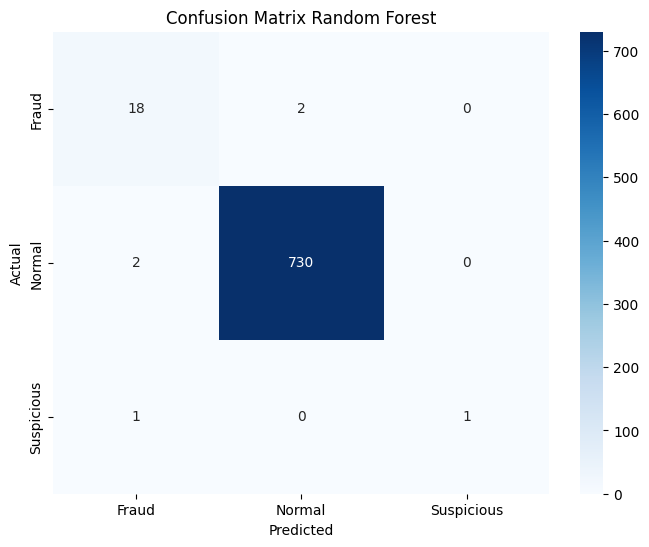

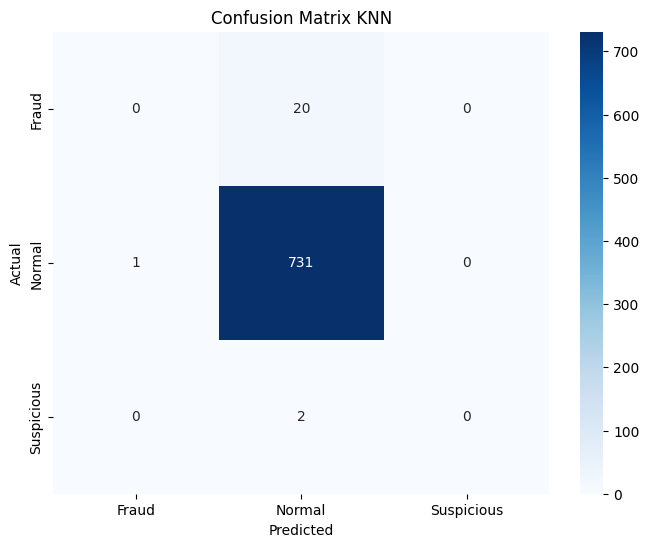

In [60]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fraud', 'Normal', 'Suspicious'], yticklabels=['Fraud', 'Normal', 'Suspicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fraud', 'Normal', 'Suspicious'], yticklabels=['Fraud', 'Normal', 'Suspicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

1. **Akurasi**
**Random Forest: 99.34% vs KNN: 96.95%**

Ini menunjukkan bahwa Random Forest memiliki tingkat kesalahan yang lebih kecil dalam mengklasifikasikan transaksi sebagai fraud atau normal.

2. **F1-Score**
**Random Forest: 99.32% vs KNN: 95.58%**

Hasil ini menunjukkan bahwa Random Forest lebih optimal dalam menangani keseimbangan antara False Positives dan False Negatives.

3. **Precision**
**Random Forest: 99.36% vs KNN: 94.25%**

Random Forest lebih baik dalam meminimalkan False Positives (transaksi yang salah diklasifikasikan sebagai fraud).

4. **Recall**
**Random Forest: 99.34% vs KNN: 96.65%**

Random Forest lebih baik dalam mendeteksi kasus fraud tanpa terlalu banyak False Negatives.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [61]:
# Saya tidak menggunakannya karena saya mengganggap bahwa model sudah optimal dilihat dari metrik evaluasinya

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [62]:
# Saya tidak menggunakannya karena saya mengganggap bahwa model sudah optimal dilihat dari metrik evaluasinya

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **Analisis Hasil Evaluasi Model Klasifikasi**

#### **- Identifikasi Kelemahan Model**

- KNN memiliki kelemahan dalam mendeteksi transaksi fraud dengan presisi tinggi, yang bisa menyebabkan terlalu banyak False Positives.

- Random Forest lebih stabil dan lebih baik dalam mendeteksi transaksi fraud dengan tingkat kesalahan yang lebih rendah.

- Random Forest mungkin mengalami overfitting jika performanya terlalu tinggi di data latih tetapi menurun di data uji.

- KNN kurang efektif untuk dataset besar dan kompleks, karena perhitungannya berbasis jarak dan sensitif terhadap outlier.

---

#### **- Rekomendasi Tindakan Lanjutan**

Melakukan tuning hyperparameter karena model terlihat ada indikasi overfitting. Lalu, untuk model KNN bisa juga dengan menggunakan teknik feature scaling untuk perhitungan jarak yang lebih stabil dan menggunakan Hyperparameter seperti GridSearch untuk mencari nilai K yang lebih optimal.